# EN.553.436/646 Homework 1

# Instructions
- Answer in the indicated areas in the code cells below.
- Comment your code where necessary for clarity.
- Use default parameters for functions unless asked to do otherwise.
- Run the given completed code cells as you read through the problems.
- Use only modules provided in the code cells. Below we load several modules that can be used throughout:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Submission
- When you have your final draft, restart the kernel and run the whole notebook from beginning to end.
- Go to File > Print Preview. Save the Print Preview as a PDF.
- Upload the PDF to Gradescope. This is the file that will be graded.
- Mark the problems as you submit to Gradescope. If you do not mark a problem, your grader has permission to give you zero points.
- Save the notebook as an IPYNB file.
- Submit the IPYNB file in the designated section on Gradescope. This submission will not be graded. It is for grader reference only. You do not have to mark any parts.

# 1

Use [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) in the following exercises. We define a random 3x2 ndarray:

In [2]:
arr = np.array([[3, 7], [6, 2], [1, 4]])
arr

array([[3, 7],
       [6, 2],
       [1, 4]])

## 1.1 (1 pt.)
Normalize each column by subtracting the column mean from every column entry and dividing the difference by the column standard deviation. Return the result.

In [3]:
(arr - np.mean(arr, axis=0))/np.std(arr, axis=0)

array([[-0.16222142,  1.29777137],
       [ 1.29777137, -1.13554995],
       [-1.13554995, -0.16222142]])

## 1.2 (3 pts.)
Repeat the above but for the rows. Operate directly on `arr` as given and use broadcasting.

In [4]:
(arr - np.mean(arr, axis=1).reshape(3,-1))/np.std(arr, axis=1).reshape(3,-1)

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.]])

# 2

We draw and store 1,000 simulated samples from a [cosine distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html) with PDF defined by 

$$f_{\text{Cosine}}(x) = \frac{1}{2\pi} (1 + \cos(x))$$

In [5]:
sample = stats.cosine.rvs(size=1000, random_state=636)

## 2.1 (4 pts.)
The cosine _kernel_ is defined by

$$K(u) = \frac{\pi}{4}\cos\left(\frac{\pi}{2}u\right) \qquad\text{for }\lvert u \rvert \leq 1$$

The cosine _kernel_ is distinct from the cosine _distribution_. But, one might guess that the cosine kernel would be good to use in density estimation for the cosine distribution, since both the distribution and the kernel involve cosine function.

Define a cosine KDE function and run the cell below to plot cosine KDEs of varying bandwidths against the actual PDF of the cosine distribution.

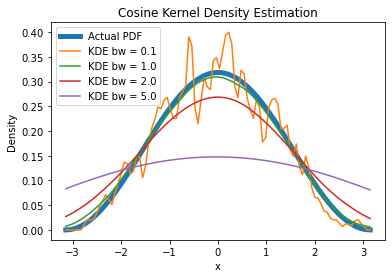

In [6]:
### Define the KDE function kde(x, sample, bw) below.
# kde: Name of function.
# x: Array of points on which to evaluate the KDE.
# sample: Array of sample points on which the KDE is based.
# bw: Bandwidth.
# Return value: An array of density estimate values for x.

def kde(x, sample, bw):
    ret = np.zeros(x.size)
    n = sample.size
    for i in range(x.size):
        add = 0
        for j in range(sample.size):
            if abs(x[i]-sample[j])/bw <= 1:
                add += (np.pi/4) * np.cos((np.pi/2) * (x[i]-sample[j])/bw)
#         print(add)
        ret[i] = add / (n*bw)
    return ret


### Run after making previous definition.

bw_list = [0.1, 1.0, 2.0, 5.0]
x = np.linspace(-np.pi, np.pi, 100)
plt.plot(x, stats.cosine.pdf(x), linewidth=5)
for bw in bw_list:
    est = kde(x, sample, bw);
    plt.plot(x, est)
    
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Cosine Kernel Density Estimation")
plt.legend(['Actual PDF','KDE bw = 0.1','KDE bw = 1.0','KDE bw = 2.0','KDE bw = 5.0'])
plt.show()

# 3

## 3.1 (6 pts.)

The $\text{Gamma}(a, \lambda)$ distribution is defined by the PDF

$$f_{\text{Gamma}}(t) = \frac{\lambda^{a}t^{a-1}e^{-\lambda t}}{\Gamma(a)}$$

where $$\Gamma(a) = \int_{0}^{\infty} z^{a-1} e^{-z}\, dz$$

The $\text{Expon}(\lambda)$ distribution is defined by the PDF

$$f_{\text{Expon}}(t) = \lambda e^{-\lambda t}$$

It is an interesting fact that if

$$X_1, X_2, \ldots, X_a \sim \text{Expon}(\lambda)$$

then 

$$X = \sum_{i=1}^a X_i \sim \text{Gamma}(a, \lambda)$$

Using this fact, if we want to sample from a $\text{Gamma}(a, \lambda)$ distribution, we can sum up $a$ samples from an $\text{Expon}(\lambda)$ distribution. A sampling algorithm that uses this fact along with the inverse transform method is as follows:

For $k=1, 2, \ldots, n$:
1. Sample $a$ times individualy from a uniform distribution to get samples $u_{k1}, u_{k2}, \ldots, u_{ka}$
2. Derive a size $a$ $\text{Expon}(\lambda)$ sample $x_{k1}, x_{k2}, \ldots, x_{ka}$ using the inverse transform method.
3. Sum up the $\text{Expon}(\lambda)$ sample values to get a $\text{Gamma}(a, \lambda)$ sample value $x_{k} = \sum_{i=1}^a x_{ki}$.

Implement this algorithm below to draw 5000 samples from a gamma distribution with $a=5$ and $\lambda=15$. For the inverse transform step, note that the $\text{Expon}(\lambda)$ CDF is $F_{\text{Expon}}(t) = 1 - \exp(-\lambda t)$.

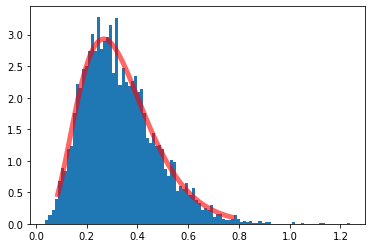

In [7]:
# Parameters for the gamma distribution.
a = 5
lam = 15

### Implement the sampling algorithm here.
# Store the samples in this variable.
samples = []

for i in range(5000):
    U = np.random.uniform(size=a)
    EXP = -(1/lam) * np.log(1-U)
    samples.append(np.sum(EXP))


# Run the code below when finished.
plt.hist(samples, density=True, bins=100)

x = np.linspace(stats.gamma.ppf(0.01, a=a, scale=1/lam), stats.gamma.ppf(0.99, a=a, scale=1/lam), 100)
plt.plot(x, stats.gamma.pdf(x, a=a, scale=1/lam),'r-', lw=5, alpha=0.6, label='Gamma PDF')
plt.show()

# 4

We load the [`diabetes`](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html) dataset into an ndarray. Read the description of the dataset to understand the meaning of its columns.

In [8]:
diab = np.loadtxt("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", skiprows=1)
diab.shape

(442, 11)

 Our goal is to predict `Y`, which is a quantitative measure of diabetes progression one year after baseline. We split the dataset into a training and test dataset. The training dataset will be the one on which we train our models, and the test dataset will be the one on which we test our models.

In [9]:
np.random.seed(436)
np.random.shuffle(diab)
train, test = diab[:295,:], diab[295:,:]

# 4.1 (6 pts.)
Return the coefficients of a linear model, with intercept, fit to the training dataset, using `AGE`, `SEX`, and `BMI` to predict `Y`. Implement the coefficient calculation procedure yourself using formulae from lecture. 

For reference, below are the coefficients give by the linear regression routine of the machine learning module [`sklearn`](https://scikit-learn.org/stable/index.html). Check your answer against this output. Note that your answer may differ in trailing significant digits due to differences in how `sklearn` implements computer arithmetic.

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept=True).fit(train[:,:3], train[:,10])
print('Predictor Coefficients\n', reg.coef_)
print('Intercept\n', reg.intercept_)

Predictor Coefficients
 [ 0.51065165 -9.26172033 10.70437793]
Intercept
 -137.49555306375353


In [11]:
X = np.append(train[:,:3], np.ones(train.shape[0]).reshape(-1,1), axis=1)
y = train[:,10]
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([   0.51065165,   -9.26172033,   10.70437793, -137.49555306])